creating the directed graph

In [11]:
!pip install google-colab

  Using cached google-colab-1.0.0.tar.gz (72 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached google_auth-1.4.2-py2.py3-none-any.whl (64 kB)
  Using cached ipykernel-4.6.1-py3-none-any.whl (104 kB)
  Using cached ipython-5.5.0-py3-none-any.whl (758 kB)
  Using cached notebook-5.2.2-py2.py3-none-any.whl (8.0 MB)
  Using cached six-1.12.0-py2.py3-none-any.whl (10 kB)
  Using cached pandas-0.24.2.tar.gz (11.8 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend depend

  error: subprocess-exited-with-error
  
  × Preparing metadata (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [4 lines of output]
      <string>:12: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
      error in pandas setup command: 'install_requires' must be a string or list of strings containing valid project/version requirement specifiers; Expected end or semicolon (after version specifier)
          pytz >= 2011k
               ~~~~~~~^
      [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.

[notice] A new release of pip is available: 23.1.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [12]:
# if creates error ignore this block
from google.colab import drive
drive.mount('/content/drive')

In [13]:
import pandas as pd
import networkx as nx
#import plotly.graph_objects as go

# Read Excel file
file_id = '1ciXpaweX8GCQzjp6vIQFjFSUHW6y0x_7'
link = f'https://drive.google.com/uc?id={file_id}'
data_df= pd.read_csv(link)
print(data_df)
# Create an empty graph
graph = nx.MultiDiGraph()
#Add edges with link sentiment weights
for _, row in data_df.iterrows():
    source = row['SOURCE_SUBREDDIT']
    target = row['TARGET_SUBREDDIT']
    # sentiment = row['LINK_SENTIMENT']
    graph.add_edge(source, target)






       SOURCE_SUBREDDIT TARGET_SUBREDDIT  POST_ID            TIMESTAMP  \
0            rddtgaming         rddtrust  1u4pzzs  2013-12-31 16:39:18   
1               xboxone    battlefield_4  1u4tmfs  2013-12-31 17:59:11   
2                   ps4    battlefield_4  1u4tmos  2013-12-31 17:59:40   
3     fitnesscirclejerk        leangains  1u50xfs  2013-12-31 19:01:56   
4     fitnesscirclejerk      lifeprotips  1u51nps  2013-12-31 21:02:28   
...                 ...              ...      ...                  ...   
4995         switcharoo              wtf  1vikvbs  2014-01-18 01:02:53   
4996        linux4noobs  programmerhumor   1vikzd  2014-01-18 03:01:58   
4997     subredditdrama            anime   1vil88  2014-01-18 02:19:39   
4998           carcrash          roadcam  1vinbus  2014-01-18 10:55:41   
4999       warhammer40k        warhammer  1vine2s  2014-01-18 02:33:08   

      LINK_SENTIMENT  
0                  1  
1                  1  
2                  1  
3                  

In [14]:
data_df

,SOURCE_SUBREDDIT,TARGET_SUBREDDIT,POST_ID,TIMESTAMP,LINK_SENTIMENT
0,rddtgaming,rddtrust,1u4pzzs,2013-12-31 16:39:18,1
1,xboxone,battlefield_4,1u4tmfs,2013-12-31 17:59:11,1
2,ps4,battlefield_4,1u4tmos,2013-12-31 17:59:40,1
3,fitnesscirclejerk,leangains,1u50xfs,2013-12-31 19:01:56,1
4,fitnesscirclejerk,lifeprotips,1u51nps,2013-12-31 21:02:28,1
...,...,...,...,...,...
4995,switcharoo,wtf,1vikvbs,2014-01-18 01:02:53,1
4996,linux4noobs,programmerhumor,1vikzd,2014-01-18 03:01:58,-1
4997,subredditdrama,anime,1vil88,2014-01-18 02:19:39,-1
4998,carcrash,roadcam,1vinbus,2014-01-18 10:55:41,1


creating the undirected graph

In [15]:
import pandas as pd
import networkx as nx
# Create an empty graph
#graph = nx.MultiDiGraph()
file_id = '1ciXpaweX8GCQzjp6vIQFjFSUHW6y0x_7'
link = f'https://drive.google.com/uc?id={file_id}'
data_df= pd.read_csv(link)
graph_undirected = nx.MultiGraph()
# Add edges with link sentiment weights
for _, row in data_df.iterrows():
    source = row['SOURCE_SUBREDDIT']
    target = row['TARGET_SUBREDDIT']
    # sentiment = row['LINK_SENTIMENT']
    graph_undirected.add_edge(source, target)
# weight=sentiment


adding the categories as attributes to the nodes to both graphs

In [16]:

file_id = '1hPv8mRIyycXQb7qt-VALR5DniHq3A2Ng'
link = f'https://drive.google.com/uc?id={file_id}'
df = pd.read_csv(link)  # Replace with the path to your sheet file

# Create a dictionary mapping subreddits to categories
subreddit_category = dict(zip(df['SOURCE_SUBREDDIT'], df['CATEGORY']))

# Iterate over each node in the graph and assign its category
for node in graph.nodes:
    if node in subreddit_category:
        graph.nodes[node]['category'] = subreddit_category[node]
    else:
        graph.nodes[node]['category'] = "Uncategorized"  # Assign a default category if no match is found

subreddit_category = dict(zip(df['SOURCE_SUBREDDIT'], df['CATEGORY']))

for node in graph_undirected.nodes:
    if node in subreddit_category:
        graph_undirected.nodes[node]['category'] = subreddit_category[node]
    else:
        graph_undirected.nodes[node]['category'] = "Uncategorized"  # Assign a default category if no match is found

# Save the updated graph
nx.write_graphml(graph, "updated_graph.graphml")

In [17]:
# Print the graph information
print("Graph Nodes:", len(graph.nodes))
print("Graph Edges:", len(graph.edges))

Graph Nodes: 2686
Graph Edges: 5000


community detection on the graph by lovain algorithm
showing which subbreddits exsist in each community

In [18]:
import community
partition = community.best_partition(graph_undirected)

# Retrieve the communities from the partition
communities = {}
for node, community_id in partition.items():
    if community_id in communities:
        communities[community_id].append(node)
    else:
        communities[community_id] = [node]

# Print the resulting communities
print("Communities:")
for community_id, nodes in communities.items():
    print(f"Community {community_id}: {nodes}")
print (len(communities))



Communities:
Community 0: ['rddtgaming', 'rddtrust', 'garrysmod']
Community 1: ['xboxone', 'battlefield_4', 'ps4', 'dayz', 'allthingsterran', 'starcraft', 'allthingszerg', 'retiredgif', 'truegaming', 'gaming', 'dota2', 'globaloffensive', 'karmamartyr', 'buildapc', 'pcmasterrace', 'drugmemes', 'redditrescueforce', 'bestofrzen', 'zen', 'truestl', 'games', 'metalgear', 'comicbooks', 'dccomics', 'firstworldanarchists', 'streetart', 'justiceleague', 'mechanicalkeyboards', 'gamingpc', 'buddhism', 'meditation', 'battlefield', 'turbografx', 'esports', 'srsgaming', 'monitors', 'codghosts', 'codcompetitive', 'starcraftcirclejerk', 'singlechampchallenge', 'leagueoflegends', 'donniedarko', 'fantheories', 'steam', 'skyrimmods', 'skyrimmodhelp', 'elderscrollsonline', 'teslore', 'dontpanic', 'pareidolia', 'dota2modding', 'dumpsterdiving', 'anticonsumption', 'shittyteslore', 'skyrim', 'destiny', 'downtimebananas', 'onepiece', 'steamos', 'bf4server', 'summonerschool', 'summoners', 'retiredoneliners', '

community detection on the graph by lovain algorithm
showing how many subreddits of each category are in each community

In [19]:
import community
import networkx as nx
from collections import Counter

# Assuming you have already loaded your graph and assigned categories to nodes

# Compute the community partition
partition_category = community.best_partition(graph_undirected)

# Retrieve the communities from the partition
communities_by_caterogy = {}
for node, community_id in partition_category.items():
    category = graph_undirected.nodes[node]['category']
    if community_id in communities_by_caterogy:
        communities_by_caterogy[community_id][category] += 1
    else:
        communities_by_caterogy[community_id] = Counter({category: 1})

# Print the resulting communities
print("Communities:")
for community_id, categories in communities_by_caterogy.items():
    sorted_categories = sorted(categories.items(), key=lambda x: x[1], reverse=True)
    category_string = ", ".join([f"{category}: {count}" for category, count in sorted_categories])
    print(f"Community {community_id}: {{{category_string}}}")


Communities:
Community 0: {gaming: 2, cryptocurrency: 1}
Community 1: {gaming: 58, entertainment: 17, technology: 10, humor: 9, location: 4, comics: 4, unknown: 4, sports: 3, spirituality: 2, art: 2, lifestyle: 2, anime: 2, community: 2, science: 1, drugs: 1, support: 1, highlights: 1, religion: 1, health: 1, parenting: 1, occult: 1, animals: 1, appliances: 1, miscellaneous: 1, charity: 1, news: 1, education: 1, creative: 1, hobbies: 1, design: 1}
Community 2: {fashion: 7, fitness: 6, humor: 6, location: 5, entertainment: 3, education: 3, health: 2, self-improvement: 2, self-help: 2, lifestyle: 2, adult content: 2, animals: 2, art: 2, tips: 1, reddit: 1, gifs: 1, music: 1, sports: 1, social media: 1, outdoors: 1, internet: 1, self-image: 1, cryptocurrency: 1, photography: 1, technology: 1}
Community 3: {health: 2}
Community 4: {sports: 16, music: 9, tv: 2, gifs: 2, humor: 2, highlights: 1, adult: 1, tools: 1, gaming: 1, art: 1, entertainment: 1, social issues: 1, baseball: 1}
Community

showing how many subreddits are in each category

In [20]:
subreddit_counts_by_category = {}

# Iterate through the nodes in the graph and count the subreddits in each category
for node, data in graph.nodes(data=True):
    category = data.get('category', 'Uncategorized')  # Default to 'Uncategorized' if no category is found
    subreddit_counts_by_category[category] = subreddit_counts_by_category.get(category, 0) + 1

# Sort the categories by the number of subreddits in each category in descending order
sorted_subreddit_counts = sorted(subreddit_counts_by_category.items(), key=lambda x: x[1], reverse=True)

# Print the counts of subreddits in each category sorted by the number of subreddits
print("Number of Subreddits in Each Category (Sorted by Subreddit Count):")
for category, count in sorted_subreddit_counts:
    print(f"Category: {category}, Subreddit Count: {count}")

Number of Subreddits in Each Category (Sorted by Subreddit Count):
Category: gaming, Subreddit Count: 327
Category: entertainment, Subreddit Count: 223
Category: humor, Subreddit Count: 161
Category: sports, Subreddit Count: 145
Category: technology, Subreddit Count: 137
Category: location, Subreddit Count: 116
Category: music, Subreddit Count: 96
Category: cryptocurrency, Subreddit Count: 76
Category: politics, Subreddit Count: 73
Category: hobbies, Subreddit Count: 73
Category: lifestyle, Subreddit Count: 59
Category: education, Subreddit Count: 53
Category: religion, Subreddit Count: 41
Category: tv shows, Subreddit Count: 35
Category: health, Subreddit Count: 34
Category: animals, Subreddit Count: 32
Category: science, Subreddit Count: 32
Category: food, Subreddit Count: 31
Category: unknown, Subreddit Count: 31
Category: art, Subreddit Count: 29
Category: automotive, Subreddit Count: 21
Category: travel, Subreddit Count: 20
Category: social issues, Subreddit Count: 20
Category: fi

we want to check which categories communicate strongly between themselfs
we defined two mesures:
for each two categories , source: A , target : B
| repost count(A,B) = how many reposts ware made from all subredits of category A to all subreddits of category B
| repost rete(A,B) =  repost count(A,B) / number of all repost made from all subreddits in category A
| we presented pairs of categories with repost count above 10 and repost rate above 10%

Category Tuples with Repost Rate > 0.1 and repost count >20 (Sorted by Repost Count - Highest First):
Source Category: conspiracy, Target Category: entertainment, Repost Rate: 0.350, Repost Count: 14.0
Source Category: unknown, Target Category: gaming, Repost Rate: 0.324, Repost Count: 11.0
Source Category: humor, Target Category: entertainment, Repost Rate: 0.206, Repost Count: 59.0
Source Category: music, Target Category: q&a, Repost Rate: 0.158, Repost Count: 19.0
Source Category: highlights, Target Category: entertainment, Repost Rate: 0.121, Repost Count: 42.0
Source Category: music, Target Category: entertainment, Repost Rate: 0.108, Repost Count: 13.0
Source Category: location, Target Category: entertainment, Repost Rate: 0.106, Repost Count: 18.0
Source Category: humor, Target Category: discussions, Repost Rate: 0.105, Repost Count: 30.0
Source Category: lifestyle, Target Category: discussions, Repost Rate: 0.104, Repost Count: 11.0


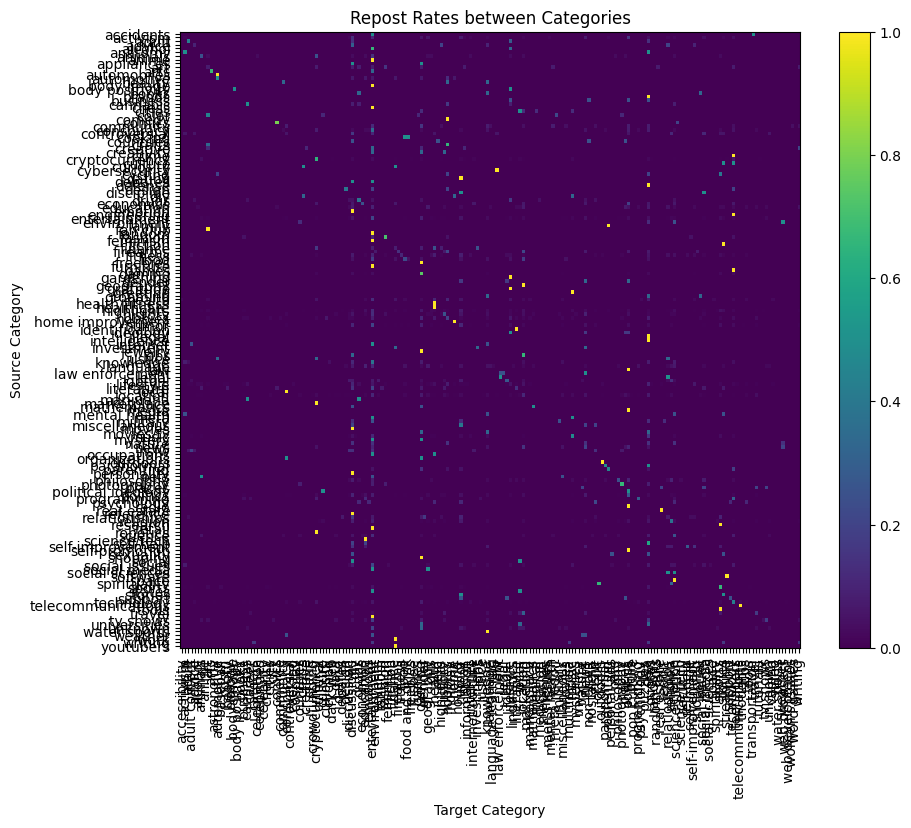

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import mplcursors  # Import the mplcursors library

# Assuming you have 'graph' representing the network, and category information is stored as 'category' in the nodes.

# Create an empty dictionary to store repost counts between categories
repost_counts = {}

# Loop through all edges in the graph and count the reposts between categories
for edge in graph.edges():
    source_subreddit = edge[0]
    target_subreddit = edge[1]
    source_category = graph.nodes[source_subreddit]['category']
    target_category = graph.nodes[target_subreddit]['category']

    # Increment the repost count between categories in the dictionary
    repost_counts[(source_category, target_category)] = repost_counts.get((source_category, target_category), 0) + 1

# Convert the repost_counts dictionary to a DataFrame
repost_df = pd.DataFrame(list(repost_counts.items()), columns=['categories', 'count'])

# Split the 'categories' column into 'source_category' and 'target_category' columns
repost_df[['source_category', 'target_category']] = pd.DataFrame(repost_df['categories'].to_list(), index=repost_df.index)

# Pivot the data to create a matrix of repost counts between categories
repost_matrix = repost_df.pivot(index='source_category', columns='target_category', values='count').fillna(0)

# Calculate the total number of reposts from each source_category
total_reposts_by_source = repost_matrix.sum(axis=1)

# Calculate repost rates (proportion of reposts to other categories)
repost_rates = repost_matrix.div(total_reposts_by_source, axis=0)

# Filter repost rates to get tuples of categories with repost rate over 0.4
high_repost_rates = repost_rates[(repost_rates > 0.1)]

# Sort high_repost_rates DataFrame by repost count in descending order
high_repost_rates = high_repost_rates.stack().reset_index(name='repost_rate')
high_repost_rates = high_repost_rates[high_repost_rates['repost_rate'] > 0.1]
high_repost_rates = high_repost_rates.sort_values(by='repost_rate', ascending=False)

# Print the tuples of categories and their repost rates sorted by repost count
print("Category Tuples with Repost Rate > 0.1 and repost count >20 (Sorted by Repost Count - Highest First):")
for index, row in high_repost_rates.iterrows():
    source_category = row['source_category']
    target_category = row['target_category']
    repost_count = repost_matrix.loc[source_category, target_category]
    repost_rate = row['repost_rate']
    if repost_count > 10 and source_category!=target_category :
        print(f"Source Category: {source_category}, Target Category: {target_category}, Repost Rate: {repost_rate:.3f}, Repost Count: {repost_count}")

# Visualization: Heatmap of repost rates
plt.figure(figsize=(10, 8))
im = plt.imshow(repost_rates, cmap='viridis', interpolation='nearest', aspect='auto')

# Add the mplcursors cursor to display details on mouseover
mplcursors.cursor(im, hover=True)

plt.colorbar()
plt.xticks(range(len(repost_rates.columns)), repost_rates.columns, rotation=90)
plt.yticks(range(len(repost_rates.index)), repost_rates.index)
plt.xlabel('Target Category')
plt.ylabel('Source Category')
plt.title('Repost Rates between Categories')
plt.show()


we wanted to check how categories repost in the categoty itself | we presented repost count and repost rate for all categories
we show the categories with highest repost count first | at the end there is a rate of how many reposts ware made inside the category across all the network

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import mplcursors  # Import the mplcursors library

# Assuming you have 'graph' representing the network, and category information is stored as 'category' in the nodes.

# Create an empty dictionary to store repost counts between categories
repost_counts = {}
inCategory_Rates = {}
# Loop through all edges in the graph and count the reposts between categories
for edge in graph.edges():
    source_subreddit = edge[0]
    target_subreddit = edge[1]
    source_category = graph.nodes[source_subreddit]['category']
    target_category = graph.nodes[target_subreddit]['category']
    if target_subreddit == "q&a":
        print ("hi")
    # Increment the repost count between categories in the dictionary
    repost_counts[(source_category, target_category)] = repost_counts.get((source_category, target_category), 0) + 1

# Convert the repost_counts dictionary to a DataFrame
repost_df = pd.DataFrame(list(repost_counts.items()), columns=['categories', 'count'])

# Split the 'categories' column into 'source_category' and 'target_category' columns
repost_df[['source_category', 'target_category']] = pd.DataFrame(repost_df['categories'].to_list(), index=repost_df.index)

# Pivot the data to create a matrix of repost counts between categories
repost_matrix = repost_df.pivot(index='source_category', columns='target_category', values='count').fillna(0)

# Calculate the total number of reposts from each source_category
total_reposts_by_source = repost_matrix.sum(axis=1)

# Calculate repost rates (proportion of reposts to other categories)
repost_rates = repost_matrix.div(total_reposts_by_source, axis=0)

# Filter repost rates to get tuples of categories with repost rate over 0.4
high_repost_rates = repost_rates[(repost_rates > 0)]

# Sort high_repost_rates DataFrame by repost count in descending order
high_repost_rates = high_repost_rates.stack().reset_index(name='repost_rate')
high_repost_rates = high_repost_rates[high_repost_rates['repost_rate'] > 0]
high_repost_rates = high_repost_rates.sort_values(by='repost_rate', ascending=False)

sum =0
# Print the tuples of categories and their repost rates sorted by repost count
for index, row in high_repost_rates.iterrows():

    source_category = row['source_category']
    target_category = row['target_category']
    repost_count = repost_matrix.loc[source_category, target_category]
    repost_rate = row['repost_rate']
    if source_category == target_category:
      sum += repost_count
      inCategory_Rates[source_category] = [round(repost_rate, 3),repost_count]

# Sort inCategory_Rates by repost_count
sorted_inCategory_Rates = sorted(inCategory_Rates.items(), key=lambda x: x[1][1], reverse=True)

# Print inCategory_Rates sorted by repost_count
print("In-Category Repost Rates Sorted by Repost Count:")
for category, (repost_rate, repost_count) in sorted_inCategory_Rates:
    print(f"Category: {category}, Repost Rate: {repost_rate}, Repost Count: {repost_count}")
print ('number of post made in category is: ',sum,' out of 5000')


In-Category Repost Rates Sorted by Repost Count:
Category: gaming, Repost Rate: 0.744, Repost Count: 279.0
Category: entertainment, Repost Rate: 0.21, Repost Count: 274.0
Category: sports, Repost Rate: 0.672, Repost Count: 135.0
Category: politics, Repost Rate: 0.271, Repost Count: 88.0
Category: cryptocurrency, Repost Rate: 0.649, Repost Count: 87.0
Category: technology, Repost Rate: 0.424, Repost Count: 73.0
Category: music, Repost Rate: 0.483, Repost Count: 58.0
Category: religion, Repost Rate: 0.375, Repost Count: 36.0
Category: humor, Repost Rate: 0.108, Repost Count: 31.0
Category: location, Repost Rate: 0.112, Repost Count: 19.0
Category: fashion, Repost Rate: 0.714, Repost Count: 15.0
Category: history, Repost Rate: 0.255, Repost Count: 14.0
Category: hobbies, Repost Rate: 0.19, Repost Count: 12.0
Category: parenting, Repost Rate: 0.476, Repost Count: 10.0
Category: science, Repost Rate: 0.256, Repost Count: 10.0
Category: philosophy, Repost Rate: 0.25, Repost Count: 10.0
Categ

In [23]:
# from networkx.algorithms.community.quality import modularity
# mod = modularity(graph, communities)
# print(mod)

we want to check what are the categories that users repost from them the most in a positive way | we defines 3 mesures | category_agenda_alignment = sum of out going edges with whight 1 out of all subreddits in category | category_misalignment = sum of out going edges with whight -1 out of all subreddits in category | category_outdegree = sum of all outdegree out of all subreddits in category | we are showing the top 20 categories by out degree to avoid outliers

In [24]:
# Initialize a dictionary to store the agenda alignment count for each category
category_agenda_alignment = {}
category_misalignment = {}
category_outdegree = {}
sumpos =0
sumneg = 0

# Calculate the degree of agenda alignment and misalignment for each repost (outgoing reposts only)
for _, row in data_df.iterrows():
    source_subreddit = row['SOURCE_SUBREDDIT']
    target_subreddit = row['TARGET_SUBREDDIT']
    repost_weight = row['LINK_SENTIMENT']

    source_category = graph.nodes[source_subreddit]['category']

    if source_category not in category_outdegree:
        category_outdegree[source_category] = 0

    category_outdegree[source_category] += 1

    # Check if the repost is an outgoing repost (agenda-aligned)
    if repost_weight == 1:
        sumpos +=1
        # Check if the source_category is already in the dictionary, if not, initialize it
        if source_category not in category_agenda_alignment:
            category_agenda_alignment[source_category] = 0

        # Increment the agenda alignment count for the source_category
        category_agenda_alignment[source_category] += 1
    if repost_weight == -1:  # The repost is not agenda-aligned
        # Check if the source_category is already in the dictionary, if not, initialize it
        sumneg +=1
        if source_category not in category_misalignment:
            category_misalignment[source_category] = 0

        # Increment the misalignment count for the source_category
        category_misalignment[source_category] += 1

# Print the agenda alignment and misalignment count for each category
for category, alignment_count in category_agenda_alignment.items():
    misalignment_count = category_misalignment.get(category, 0)  # Get the misalignment count, default to 0 if not present

    print(f"Category: {category}, Agenda Alignment Count: {alignment_count}, Misalignment Count: {misalignment_count}")


Category: gaming, Agenda Alignment Count: 362, Misalignment Count: 13
Category: fitness, Agenda Alignment Count: 61, Misalignment Count: 10
Category: health, Agenda Alignment Count: 39, Misalignment Count: 0
Category: sports, Agenda Alignment Count: 193, Misalignment Count: 8
Category: highlights, Agenda Alignment Count: 291, Misalignment Count: 56
Category: entertainment, Agenda Alignment Count: 1070, Misalignment Count: 233
Category: chess, Agenda Alignment Count: 1, Misalignment Count: 0
Category: cryptocurrency, Agenda Alignment Count: 131, Misalignment Count: 3
Category: animals, Agenda Alignment Count: 33, Misalignment Count: 3
Category: politics, Agenda Alignment Count: 275, Misalignment Count: 50
Category: location, Agenda Alignment Count: 169, Misalignment Count: 1
Category: finance, Agenda Alignment Count: 11, Misalignment Count: 1
Category: education, Agenda Alignment Count: 42, Misalignment Count: 0
Category: technology, Agenda Alignment Count: 164, Misalignment Count: 8
Ca

In [25]:
# top 20 with positive agenda alighnment count
sorted_categories = sorted(category_outdegree.items(), key=lambda x: x[1], reverse=True)
top_20_categories_by_outderee = sorted_categories[:20]

print("Top 20 Categories with Highest Agenda Alignment:")
for i, (category, outdegree) in enumerate(sorted_categories[:20], 1):
    print(f"{i}. Category: {category}, outdegree: {outdegree}")


Top 20 Categories with Highest Agenda Alignment:
1. Category: entertainment, outdegree: 1303
2. Category: gaming, outdegree: 375
3. Category: highlights, outdegree: 347
4. Category: politics, outdegree: 325
5. Category: humor, outdegree: 287
6. Category: sports, outdegree: 201
7. Category: technology, outdegree: 172
8. Category: location, outdegree: 170
9. Category: cryptocurrency, outdegree: 134
10. Category: music, outdegree: 120
11. Category: lifestyle, outdegree: 106
12. Category: religion, outdegree: 96
13. Category: fitness, outdegree: 71
14. Category: hobbies, outdegree: 63
15. Category: history, outdegree: 55
16. Category: activism, outdegree: 52
17. Category: language, outdegree: 44
18. Category: education, outdegree: 42
19. Category: social issues, outdegree: 42
20. Category: philosophy, outdegree: 40


we added another mesure , category_positive_rate which stands for out of all the repost from a category what pracentage is positive reposts |
category_positive_rate = category_agenda_alignment / category_outdegree | we sort the top 20 categories by outdegree we got before by thair category_positive_rate

In [26]:
category_positive_repost_rate = {}
for category, alignment_count in category_agenda_alignment.items():
    category_outgoing_reposts = category_outdegree.get(category, 0)
    if category_outgoing_reposts > 0:
        positive_repost_rate = alignment_count / category_outgoing_reposts
    else:
        positive_repost_rate = 0.0
    category_positive_repost_rate[category] = positive_repost_rate

sorted_repost_rates = sorted(category_positive_repost_rate.items(), key=lambda x: x[1], reverse=True)


In [27]:
# Sort the categories in sorted_categories by positive repost rate
sorted_categories_by_positive_rate = sorted(top_20_categories_by_outderee, key=lambda x: category_positive_repost_rate[x[0]], reverse=True)

# Print the top 20 categories with highest positive repost rates
print("Top 20 Categories with Highest Positive Repost Rate:")
for i, (category, alignment_count) in enumerate(sorted_categories_by_positive_rate[:20], 1):
    repost_rate = category_positive_repost_rate[category]
    print(f"{i}. Category: {category}, Positive Repost Rate: {repost_rate}")

Top 20 Categories with Highest Positive Repost Rate:
1. Category: education, Positive Repost Rate: 1.0
2. Category: location, Positive Repost Rate: 0.9941176470588236
3. Category: cryptocurrency, Positive Repost Rate: 0.9776119402985075
4. Category: lifestyle, Positive Repost Rate: 0.9716981132075472
5. Category: gaming, Positive Repost Rate: 0.9653333333333334
6. Category: sports, Positive Repost Rate: 0.9601990049751243
7. Category: technology, Positive Repost Rate: 0.9534883720930233
8. Category: hobbies, Positive Repost Rate: 0.9523809523809523
9. Category: religion, Positive Repost Rate: 0.9375
10. Category: music, Positive Repost Rate: 0.9166666666666666
11. Category: language, Positive Repost Rate: 0.9090909090909091
12. Category: philosophy, Positive Repost Rate: 0.9
13. Category: humor, Positive Repost Rate: 0.8745644599303136
14. Category: fitness, Positive Repost Rate: 0.8591549295774648
15. Category: politics, Positive Repost Rate: 0.8461538461538461
16. Category: highlight

In [28]:
import pandas as pd
import networkx as nx
import community

# Assuming you have the repost data in a pandas DataFrame named 'reposts_df'
# Columns: 'source_subreddit', 'target_subreddit', 'repost_weight'

# Assuming you have created your graph and named it 'graph'
# You have assigned the category as an attribute to each node in the graph
# For example, during graph creation, you might have done:
# graph.add_node('subreddit_A', category='category_X')

# Initialize a dictionary to store the agenda alignment count for each community
community_agenda_alignment = {}

# Calculate the degree of agenda alignment for each repost (outgoing reposts only)
for _, row in data_df.iterrows():
    source_subreddit = row['SOURCE_SUBREDDIT']
    target_subreddit = row['TARGET_SUBREDDIT']
    repost_weight = row['LINK_SENTIMENT']

    # Check if the repost is an outgoing repost (agenda-aligned)
    if repost_weight == 1:
        # Retrieve the community ID of the source_subreddit from the partition
        source_community_id = partition[source_subreddit]

        # Check if the source_community_id is already in the dictionary, if not, initialize it
        if source_community_id not in community_agenda_alignment:
            community_agenda_alignment[source_community_id] = 0

        # Increment the agenda alignment count for the source_community_id
        community_agenda_alignment[source_community_id] += 1

# Print the agenda alignment count for each community in sorted order by community ID
print("Community Agenda Alignment:")
for community_id, alignment_count in community_agenda_alignment.items():
    print(f"Community ID: {community_id}, Agenda Alignment Count: {alignment_count}")



Community Agenda Alignment:
Community ID: 0, Agenda Alignment Count: 2
Community ID: 1, Agenda Alignment Count: 244
Community ID: 2, Agenda Alignment Count: 117
Community ID: 3, Agenda Alignment Count: 1
Community ID: 4, Agenda Alignment Count: 108
Community ID: 17, Agenda Alignment Count: 191
Community ID: 6, Agenda Alignment Count: 563
Community ID: 7, Agenda Alignment Count: 518
Community ID: 8, Agenda Alignment Count: 4
Community ID: 9, Agenda Alignment Count: 300
Community ID: 10, Agenda Alignment Count: 94
Community ID: 13, Agenda Alignment Count: 1
Community ID: 15, Agenda Alignment Count: 149
Community ID: 16, Agenda Alignment Count: 471
Community ID: 18, Agenda Alignment Count: 49
Community ID: 19, Agenda Alignment Count: 13
Community ID: 21, Agenda Alignment Count: 47
Community ID: 22, Agenda Alignment Count: 63
Community ID: 11, Agenda Alignment Count: 418
Community ID: 23, Agenda Alignment Count: 2
Community ID: 24, Agenda Alignment Count: 204
Community ID: 25, Agenda Align

In [29]:
sorted_communities = sorted(community_agenda_alignment.items(), key=lambda x: x[1], reverse=True)

# Print the top 20 communities with the highest agenda alignment count
print("Top 20 Communities with Highest Agenda Alignment:")
for i, (community_id, alignment_count) in enumerate(sorted_communities[:20], 1):
    print(f"{i}. Community ID: {community_id}, Agenda Alignment Count: {alignment_count}")

Top 20 Communities with Highest Agenda Alignment:
1. Community ID: 6, Agenda Alignment Count: 563
2. Community ID: 7, Agenda Alignment Count: 518
3. Community ID: 16, Agenda Alignment Count: 471
4. Community ID: 11, Agenda Alignment Count: 418
5. Community ID: 9, Agenda Alignment Count: 300
6. Community ID: 1, Agenda Alignment Count: 244
7. Community ID: 24, Agenda Alignment Count: 204
8. Community ID: 17, Agenda Alignment Count: 191
9. Community ID: 15, Agenda Alignment Count: 149
10. Community ID: 2, Agenda Alignment Count: 117
11. Community ID: 4, Agenda Alignment Count: 108
12. Community ID: 20, Agenda Alignment Count: 101
13. Community ID: 10, Agenda Alignment Count: 94
14. Community ID: 38, Agenda Alignment Count: 76
15. Community ID: 33, Agenda Alignment Count: 75
16. Community ID: 22, Agenda Alignment Count: 63
17. Community ID: 27, Agenda Alignment Count: 58
18. Community ID: 65, Agenda Alignment Count: 57
19. Community ID: 18, Agenda Alignment Count: 49
20. Community ID: 31, 

creating a category graph | the nodes are categories

In [31]:
import pandas as pd
import networkx as nx

# Read Excel file containing the graph data (edges)


file_id = '1ciXpaweX8GCQzjp6vIQFjFSUHW6y0x_7'
link = f'https://drive.google.com/uc?id={file_id}'
data_df= pd.read_csv(link)

# Create an empty graph to represent the original network
graph_= nx.Graph()

# Add edges with link sentiment weights
for _, row in data_df.iterrows():
    source = row['SOURCE_SUBREDDIT']
    target = row['TARGET_SUBREDDIT']
    # sentiment = row['LINK_SENTIMENT']
    graph_.add_edge(source, target)

# Read Excel file containing the mapping of subreddits to categories
file_id = '1hPv8mRIyycXQb7qt-VALR5DniHq3A2Ng'
link = f'https://drive.google.com/uc?id={file_id}'
df = pd.read_csv(link)  # Replace with the path to your sheet file

# Create a dictionary mapping subreddits to categories
subreddit_category = dict(zip(df['SOURCE_SUBREDDIT'], df['CATEGORY']))

# Create a new graph where nodes represent categories
category_graph = nx.MultiDiGraph()

# Traverse the edges of the original graph and create edges between categories in the new graph
for source, target in graph_.edges():
    if source in subreddit_category and target in subreddit_category:
        source_category = subreddit_category[source]
        target_category = subreddit_category[target]
        if source_category != target_category:

         category_graph.add_edge(source_category, target_category)

# Save the updated graph representing categories
nx.write_graphml(category_graph, "category_graph.graphml")


In [32]:
import pandas as pd
import networkx as nx

# Read Excel file containing the graph data (edges)
file_id = '1ciXpaweX8GCQzjp6vIQFjFSUHW6y0x_7'
link = f'https://drive.google.com/uc?id={file_id}'
data_df= pd.read_csv(link)
sumedge =0
sum_busak =0
# Create an empty graph to represent the original network
graph_= nx.Graph()

# Add edges with link sentiment weights
for _, row in data_df.iterrows():
    source = row['SOURCE_SUBREDDIT']
    target = row['TARGET_SUBREDDIT']
    # sentiment = row['LINK_SENTIMENT']
    graph_.add_edge(source, target)

# Read Excel file containing the mapping of subreddits to categories
file_id = '1hPv8mRIyycXQb7qt-VALR5DniHq3A2Ng'
link = f'https://drive.google.com/uc?id={file_id}'
df = pd.read_csv(link)  # Replace with the path to your sheet file

# Create a dictionary mapping subreddits to categories
subreddit_category = dict(zip(df['SOURCE_SUBREDDIT'], df['CATEGORY']))

# Create a new graph where nodes represent categories
category_graph_undirected = nx.MultiGraph()

# Traverse the edges of the original graph and create edges between categories in the new graph
for source, target in graph_.edges():
    if source in subreddit_category and target in subreddit_category:
        source_category = subreddit_category[source]
        target_category = subreddit_category[target]
        if source_category != target_category:
         sumedge += 1
         category_graph_undirected.add_edge(source_category, target_category)
        else :
            sum_busak+=1

# Save the updated graph representing categories
nx.write_graphml(category_graph, "category_graph.graphml")
print(sum_busak+sumedge)

4035


visualization of the graph

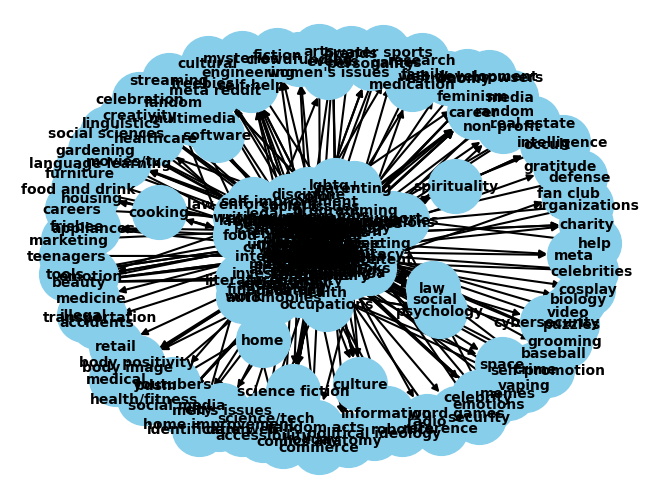

In [33]:
pos = nx.spring_layout(category_graph)  # Position the nodes using the spring layout algorithm
nx.draw(category_graph, pos, with_labels=True, node_color='skyblue', node_size=1500, font_size=10, font_weight='bold', width=1.5)

detecting communities on the category graph by lovain algorithm

In [34]:
import community
partition = community.best_partition(category_graph_undirected)

# Retrieve the communities from the partition
communities = {}
for node, community_id in partition.items():
    if community_id in communities:
        communities[community_id].append(node)
    else:
        communities[community_id] = [node]

# Print the resulting communities
print("Communities:")
for community_id, nodes in communities.items():
    print(f"Community {community_id}: {nodes}")
print (len(communities))



Communities:
Community 0: ['gaming', 'entertainment', 'sports', 'humor', 'fashion', 'animals', 'photography', 'art', 'tools', 'military', 'accidents', 'writing', 'literature', 'tv shows', 'knowledge', 'tv', 'miscellaneous', 'fandom', 'comics', 'science fiction', 'community', 'chess', 'pets', 'creative', 'furniture', 'web development', 'holiday', 'thoughts', 'ideas', 'movies', 'self-image', 'word games', 'beauty', 'random', 'memes', 'data', 'reddit', 'water sports', 'movies/tv', 'celebration', 'medicine', 'anime', 'retail', 'charity', 'fan club', 'frisbee', 'research', 'video', 'arts', 'games', 'identification', 'transportation', 'careers', 'multimedia', 'puzzles', 'city', 'jewelry', 'color', 'meta reddit', 'cosplay', "women's issues", 'biology', 'random acts', 'baseball']
Community 1: ['cryptocurrency', 'technology', 'programming', 'parenting', 'finance', 'internet culture', 'career', 'pop culture', 'economics', 'robotics', 'jobs', 'tutorials', 'quotes', 'dark web', 'streaming', 'inves

top 20 categories with highest betweenness centrality

In [35]:
betweenness_centrality = nx.betweenness_centrality(category_graph)

# Sort the nodes based on their betweenness centrality values in descending order
sorted_nodes = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)

# Print the top 20 nodes with the highest betweenness centrality
print("Top 20 Nodes with Highest Betweenness Centrality:")
for i, (node, centrality) in enumerate(sorted_nodes[:20]):
    print(f"{i+1}. Node: {node}, Betweenness Centrality: {centrality:.5f}")

Top 20 Nodes with Highest Betweenness Centrality:
1. Node: entertainment, Betweenness Centrality: 0.18202
2. Node: gaming, Betweenness Centrality: 0.06941
3. Node: humor, Betweenness Centrality: 0.05257
4. Node: technology, Betweenness Centrality: 0.04899
5. Node: location, Betweenness Centrality: 0.04805
6. Node: lifestyle, Betweenness Centrality: 0.04296
7. Node: politics, Betweenness Centrality: 0.04107
8. Node: hobbies, Betweenness Centrality: 0.03112
9. Node: cryptocurrency, Betweenness Centrality: 0.02513
10. Node: q&a, Betweenness Centrality: 0.02118
11. Node: education, Betweenness Centrality: 0.02076
12. Node: science, Betweenness Centrality: 0.01958
13. Node: highlights, Betweenness Centrality: 0.01885
14. Node: health, Betweenness Centrality: 0.01842
15. Node: religion, Betweenness Centrality: 0.01719
16. Node: discussions, Betweenness Centrality: 0.01597
17. Node: sports, Betweenness Centrality: 0.01372
18. Node: art, Betweenness Centrality: 0.01372
19. Node: finance, Betwe

top 20 categories with highest closeness centrality

In [36]:
closeness_centrality = nx.closeness_centrality(category_graph)

# Sort the nodes based on their closeness centrality values in descending order
sorted_nodes = sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)

# Print the top 20 nodes with the highest closeness centrality
print("Top 20 Nodes with Highest Closeness Centrality:")
for i, (node, centrality) in enumerate(sorted_nodes[:20]):
    print(f"{i+1}. Node: {node}, Closeness Centrality: {centrality:.5f}")

Top 20 Nodes with Highest Closeness Centrality:
1. Node: entertainment, Closeness Centrality: 0.31977
2. Node: gaming, Closeness Centrality: 0.29588
3. Node: humor, Closeness Centrality: 0.29225
4. Node: location, Closeness Centrality: 0.29225
5. Node: technology, Closeness Centrality: 0.28523
6. Node: politics, Closeness Centrality: 0.27639
7. Node: education, Closeness Centrality: 0.27321
8. Node: lifestyle, Closeness Centrality: 0.27113
9. Node: hobbies, Closeness Centrality: 0.27113
10. Node: science, Closeness Centrality: 0.26909
11. Node: music, Closeness Centrality: 0.26313
12. Node: sports, Closeness Centrality: 0.26025
13. Node: religion, Closeness Centrality: 0.26025
14. Node: unknown, Closeness Centrality: 0.25558
15. Node: social issues, Closeness Centrality: 0.25467
16. Node: cryptocurrency, Closeness Centrality: 0.25287
17. Node: language, Closeness Centrality: 0.25020
18. Node: travel, Closeness Centrality: 0.25020
19. Node: tv shows, Closeness Centrality: 0.24846
20. No

we want to learn about the subreddits so we checked the same mesures about the subreddits insted of categories | subrettids by alighnment and misalighnment count

In [37]:
# Initialize a dictionary to store the agenda alignment count for each category
subreddit_agenda_alignment = {}
subreddit_misalignment = {}
subreddit_outdegree = {}
sumpos =0
sumneg = 0

# Calculate the degree of agenda alignment and misalignment for each repost (outgoing reposts only)
for _, row in data_df.iterrows():
    source_subreddit = row['SOURCE_SUBREDDIT']
    target_subreddit = row['TARGET_SUBREDDIT']
    repost_weight = row['LINK_SENTIMENT']


    if source_subreddit not in subreddit_outdegree:
        subreddit_outdegree[source_subreddit] = 0

    subreddit_outdegree[source_subreddit] += 1

    # Check if the repost is an outgoing repost (agenda-aligned)
    if repost_weight == 1:
        sumpos +=1
        # Check if the source_category is already in the dictionary, if not, initialize it
        if source_subreddit not in subreddit_agenda_alignment:
            subreddit_agenda_alignment[source_subreddit] = 0

        # Increment the agenda alignment count for the source_category
        subreddit_agenda_alignment[source_subreddit] += 1
    if repost_weight == -1:  # The repost is not agenda-aligned
        # Check if the source_category is already in the dictionary, if not, initialize it
        sumneg +=1
        if source_subreddit not in subreddit_misalignment:
            subreddit_misalignment[source_subreddit] = 0

        # Increment the misalignment count for the source_category
        subreddit_misalignment[source_subreddit] += 1

# Print the agenda alignment and misalignment count for each category
for subreddit, alignment_count in subreddit_agenda_alignment.items():
    misalignment_count = subreddit_misalignment.get(subreddit, 0)  # Get the misalignment count, default to 0 if not present
    print(f"subreddit: {subreddit}, Agenda Alignment Count: {alignment_count}, Misalignment Count: {misalignment_count}")


subreddit: rddtgaming, Agenda Alignment Count: 2, Misalignment Count: 0
subreddit: xboxone, Agenda Alignment Count: 1, Misalignment Count: 0
subreddit: ps4, Agenda Alignment Count: 2, Misalignment Count: 0
subreddit: fitnesscirclejerk, Agenda Alignment Count: 51, Misalignment Count: 9
subreddit: cancer, Agenda Alignment Count: 1, Misalignment Count: 0
subreddit: jleague, Agenda Alignment Count: 1, Misalignment Count: 0
subreddit: bestoftldr, Agenda Alignment Count: 9, Misalignment Count: 3
subreddit: quityourbullshit, Agenda Alignment Count: 15, Misalignment Count: 8
subreddit: bestof, Agenda Alignment Count: 232, Misalignment Count: 46
subreddit: anarchychess, Agenda Alignment Count: 1, Misalignment Count: 0
subreddit: internet_box, Agenda Alignment Count: 1, Misalignment Count: 0
subreddit: ffxiv, Agenda Alignment Count: 1, Misalignment Count: 0
subreddit: switcharoo, Agenda Alignment Count: 60, Misalignment Count: 4
subreddit: bitcoinmining, Agenda Alignment Count: 3, Misalignment C

top 20 subreddits with highest out degree

In [38]:
# top 20 with positive agenda alighnment count
sorted_subreddits = sorted(subreddit_outdegree.items(), key=lambda x: x[1], reverse=True)
top_20_subreddits_by_outdegree = sorted_subreddits[:20]

print("Top 20 Categories with Highest Agenda Alignment:")
for i, (subreddit, outdegree) in enumerate(sorted_subreddits[:20], 1):
    print(f"{i}. subreddit: {subreddit}, outdegree: {outdegree}")


Top 20 Categories with Highest Agenda Alignment:
1. subreddit: subredditdrama, outdegree: 294
2. subreddit: bestof, outdegree: 278
3. subreddit: shitredditsays, outdegree: 66
4. subreddit: switcharoo, outdegree: 64
5. subreddit: fitnesscirclejerk, outdegree: 60
6. subreddit: circlebroke2, outdegree: 60
7. subreddit: shitstatistssay, outdegree: 55
8. subreddit: titlegore, outdegree: 53
9. subreddit: shitamericanssay, outdegree: 48
10. subreddit: dogecoin, outdegree: 40
11. subreddit: retiredgif, outdegree: 36
12. subreddit: defaultgems, outdegree: 35
13. subreddit: badhistory, outdegree: 35
14. subreddit: conspiratard, outdegree: 34
15. subreddit: agitation, outdegree: 33
16. subreddit: badlinguistics, outdegree: 31
17. subreddit: conspiracy, outdegree: 31
18. subreddit: depthhub, outdegree: 29
19. subreddit: thathappened, outdegree: 27
20. subreddit: badphilosophy, outdegree: 27


top 20 subreddits by out degree (to avoid outliers) sorted by positive repost rate

In [39]:
subreddits_positive_repost_rate = {}
for subreddit, alignment_count in subreddit_agenda_alignment.items():
    subreddit_outgoing_reposts = subreddit_outdegree.get(subreddit, 0)
    if subreddit_outgoing_reposts > 0:
        positive_repost_rate = alignment_count / subreddit_outgoing_reposts
    else:
        positive_repost_rate = 0.0
    subreddits_positive_repost_rate[subreddit] = positive_repost_rate

sorted_repost_rates = sorted(subreddits_positive_repost_rate.items(), key=lambda x: x[1], reverse=True)

In [40]:
# Sort the categories in sorted_categories by positive repost rate
sorted_subreddits_by_positive_rate = sorted(top_20_subreddits_by_outdegree, key=lambda x: subreddits_positive_repost_rate[x[0]], reverse=True)

# Print the top 20 categories with highest positive repost rates
print("Top 20 Categories with Highest Positive Repost Rate:")
for i, (subreddit, alignment_count) in enumerate(sorted_subreddits_by_positive_rate[:20], 1):
    repost_rate = subreddits_positive_repost_rate[subreddit]
    print(f"{i}. Category: {subreddit}, Positive Repost Rate: {repost_rate}")

Top 20 Categories with Highest Positive Repost Rate:
1. Category: titlegore, Positive Repost Rate: 1.0
2. Category: retiredgif, Positive Repost Rate: 1.0
3. Category: dogecoin, Positive Repost Rate: 0.975
4. Category: switcharoo, Positive Repost Rate: 0.9375
5. Category: conspiracy, Positive Repost Rate: 0.9354838709677419
6. Category: depthhub, Positive Repost Rate: 0.896551724137931
7. Category: conspiratard, Positive Repost Rate: 0.8823529411764706
8. Category: badlinguistics, Positive Repost Rate: 0.8709677419354839
9. Category: badphilosophy, Positive Repost Rate: 0.8518518518518519
10. Category: fitnesscirclejerk, Positive Repost Rate: 0.85
11. Category: agitation, Positive Repost Rate: 0.8484848484848485
12. Category: shitstatistssay, Positive Repost Rate: 0.8363636363636363
13. Category: bestof, Positive Repost Rate: 0.8345323741007195
14. Category: shitredditsays, Positive Repost Rate: 0.8333333333333334
15. Category: defaultgems, Positive Repost Rate: 0.8
16. Category: thatha

top 20 subreddits with highest betweenness centrality

In [41]:
betweenness_centrality = nx.betweenness_centrality(graph)

# Sort the nodes based on their betweenness centrality values in descending order
sorted_nodes = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)

# Print the top 20 nodes with the highest betweenness centrality
print("Top 20 Nodes with Highest Betweenness Centrality:")
for i, (node, centrality) in enumerate(sorted_nodes[:20]):
    print(f"{i+1}. Node: {node}, Betweenness Centrality: {centrality:.5f}")

Top 20 Nodes with Highest Betweenness Centrality:
1. Node: todayilearned, Betweenness Centrality: 0.04725
2. Node: subredditdrama, Betweenness Centrality: 0.04672
3. Node: funny, Betweenness Centrality: 0.02382
4. Node: bestof, Betweenness Centrality: 0.02036
5. Node: bitcoin, Betweenness Centrality: 0.01657
6. Node: gaming, Betweenness Centrality: 0.01218
7. Node: bestof2013, Betweenness Centrality: 0.01091
8. Node: conspiracy, Betweenness Centrality: 0.01062
9. Node: dogecoin, Betweenness Centrality: 0.01049
10. Node: technology, Betweenness Centrality: 0.00939
11. Node: badhistory, Betweenness Centrality: 0.00854
12. Node: wtf, Betweenness Centrality: 0.00690
13. Node: dota2, Betweenness Centrality: 0.00667
14. Node: worldnews, Betweenness Centrality: 0.00476
15. Node: anarcho_capitalism, Betweenness Centrality: 0.00409
16. Node: stormcoming, Betweenness Centrality: 0.00378
17. Node: nfl, Betweenness Centrality: 0.00377
18. Node: trees, Betweenness Centrality: 0.00362
19. Node: linu

top 20 subreddits with highest clossness centrality

In [42]:
closeness_centrality = nx.closeness_centrality(graph)

# Sort the nodes based on their closeness centrality values in descending order
sorted_nodes = sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)

# Print the top 20 nodes with the highest closeness centrality
print("Top 20 Nodes with Highest Closeness Centrality:")
for i, (node, centrality) in enumerate(sorted_nodes[:20]):
    print(f"{i+1}. Node: {node}, Closeness Centrality: {centrality:.5f}")

Top 20 Nodes with Highest Closeness Centrality:
1. Node: iama, Closeness Centrality: 0.13164
2. Node: askreddit, Closeness Centrality: 0.12773
3. Node: pics, Closeness Centrality: 0.09948
4. Node: videos, Closeness Centrality: 0.09178
5. Node: funny, Closeness Centrality: 0.08687
6. Node: todayilearned, Closeness Centrality: 0.08226
7. Node: adviceanimals, Closeness Centrality: 0.08069
8. Node: bitcoin, Closeness Centrality: 0.08029
9. Node: photoshopbattles, Closeness Centrality: 0.08013
10. Node: foodporn, Closeness Centrality: 0.07964
11. Node: technology, Closeness Centrality: 0.07856
12. Node: wtf, Closeness Centrality: 0.07615
13. Node: exposureporn, Closeness Centrality: 0.07486
14. Node: hammocks, Closeness Centrality: 0.07477
15. Node: coinyewest, Closeness Centrality: 0.07397
16. Node: dogecoin, Closeness Centrality: 0.07394
17. Node: gaming, Closeness Centrality: 0.07343
18. Node: changemyview, Closeness Centrality: 0.07194
19. Node: berlin, Closeness Centrality: 0.07115
20.